In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_8_descriptive = get_prompt("descriptive", 8)
prompt_8_natural = get_prompt("natural", 8)

prompt_8_descriptive, prompt_8_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area). 8. Simulate for 1ps at 400K. You do not need to do any analysis of the 400K simulation.',
 'Simulate 1LYZ for 1ps at 300 K and for 1ps at 400K. Report the secondary structure assignments of the downloaded PDB structure and any known binding or active sites. Compute the RMSD, SASA, and radius of gyration of the 300K simulation.')

In [3]:
llm_model = "gpt-4o-2024-08-06"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_8_descriptive)

Thought: To complete the tasks, I will proceed step by step using the appropriate tools. First, I will download the PDB file for 1LYZ. Then, I will analyze the secondary structure, find binding or active sites, and set up simulations. Let's start with downloading the PDB file for 1LYZ.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
To proceed with the tasks, I will now analyze the secondary structure of the downloaded PDB file 1LYZ. 

Action:
```json
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_023648",
    "target_frames": "first"
  }
}
```To continue with the tasks, I will now find any known binding or active sites for the protein 1LYZ. 

Action:
```json
{
  "action": "GetAllKnownSites",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": ""
  }
}
```To proceed with the tasks, I will now set up and run a short simulation of the protein 1LYZ for 1 picosecond at 300 K. After th

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [6]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_023648: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_023648
 rec0_023649: dssp values for trajectory with id: 1LYZ_023648
 1LYZ_023700: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_023704: Initial positions for simulation sim0_023704
 sim0_023704: Basic Simulation of Protein 1LYZ_023700
 rec0_023704: Simulation trajectory for protein 1LYZ_023700 and simulation sim0_023704
 rec1_023704: Simulation state log for protein 1LYZ_023700 and simulation sim0_023704
 rec2_023704: Simulation pdb frames for protein 1LYZ_023700 and simulation sim0_023704
 rmsd_023704: RMSD for 023704
 fig0_023719: RMSD plot for 023704
 rgy_rec0_023704: Radii of gyration per frame for rec0_023704
 fig0_023720: Plot of radii of gyration over time for rec0_023704
 sasa_sim0_023704: Total SASA values for sim0_023704
 fig0_023739: Plot of SASA over time fo

In [7]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_023648"))

In [10]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_023648", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [17]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [16]:
# make sure trajectory and topology exist (sim1)
traj_path_1_1 = registry_1.get_mapped_path("rec0_023704")
top_path_1_1 = registry_1.get_mapped_path("top_sim0_023704")

assert os.path.exists(traj_path_1_1)
assert os.path.exists(top_path_1_1)

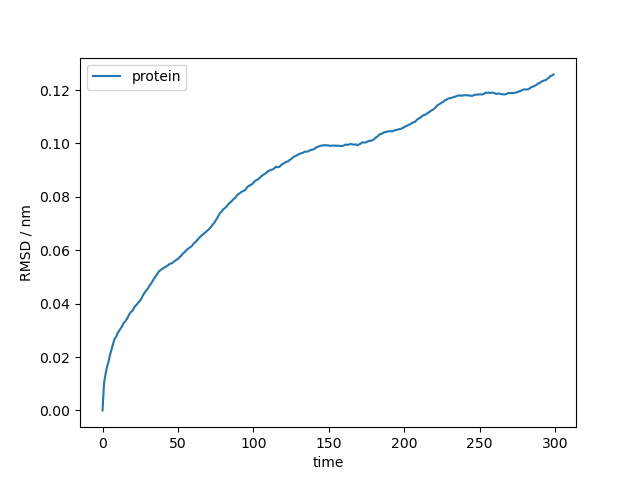

In [15]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_023719'))

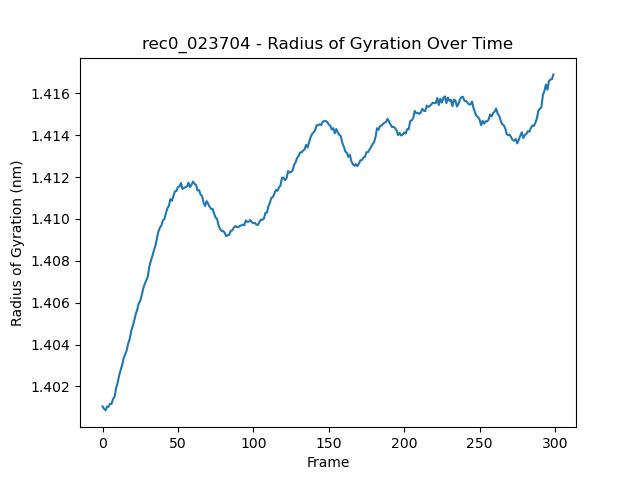

In [14]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_023720'))

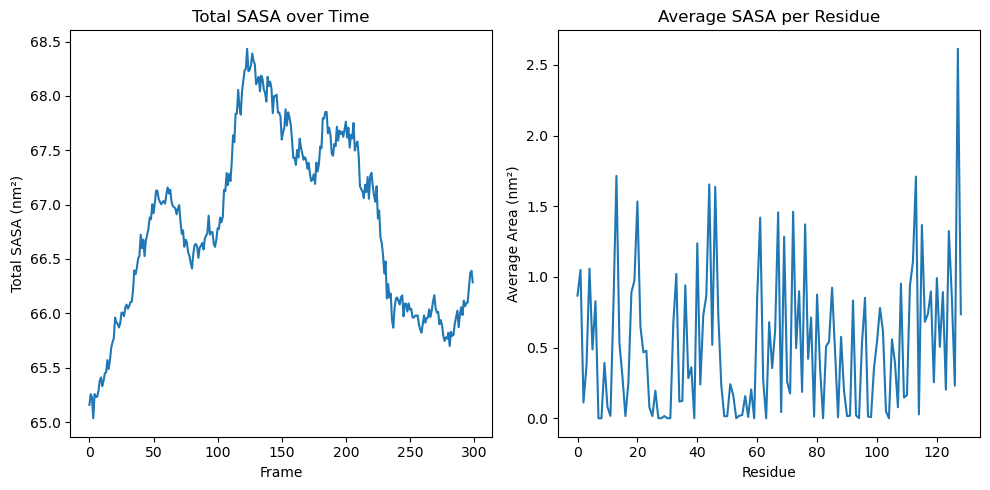

In [13]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_023739'))

In [12]:
# make sure trajectory and topology exist (sim2)
traj_path_1_2 = registry_1.get_mapped_path("rec0_023742")
top_path_1_2 = registry_1.get_mapped_path("top_sim0_023742")

assert os.path.exists(traj_path_1_2)
assert os.path.exists(top_path_1_2)

In [19]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_8_natural)

Thought: To address the question, I need to perform the following steps:

1. Download the PDB file for 1LYZ.
2. Set up and run simulations for 1LYZ at 300 K and 400 K.
3. Compute the secondary structure assignments for the downloaded PDB structure.
4. Retrieve any known binding or active sites for 1LYZ.
5. Compute the RMSD, SASA, and radius of gyration for the 300 K simulation.

I will start by downloading the PDB file for 1LYZ.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
To proceed, I need to set up and run simulations for 1LYZ at 300 K and 400 K. I will start with the simulation at 300 K.

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_030447",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
    

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [20]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_030447: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_030447
 1LYZ_030500: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_030505: Initial positions for simulation sim0_030505
 sim0_030505: Basic Simulation of Protein 1LYZ_030500
 rec0_030505: Simulation trajectory for protein 1LYZ_030500 and simulation sim0_030505
 rec1_030505: Simulation state log for protein 1LYZ_030500 and simulation sim0_030505
 rec2_030505: Simulation pdb frames for protein 1LYZ_030500 and simulation sim0_030505
 top_sim0_030515: Initial positions for simulation sim0_030515
 sim0_030515: Basic Simulation of Protein 1LYZ_030500
 rec0_030515: Simulation trajectory for protein 1LYZ_030500 and simulation sim0_030515
 rec1_030515: Simulation state log for protein 1LYZ_030500 and simulation sim0_030515
 rec2_030515: Simulation pdb frames for protein 1LYZ_0305

In [21]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_030447"))

In [22]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_030447", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [30]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [29]:
# make sure trajectory and topology exist (sim1)
traj_path_2_1 = registry_2.get_mapped_path("rec0_030505")
top_path_2_1 = registry_2.get_mapped_path("top_sim0_030505")

assert os.path.exists(traj_path_2_1)
assert os.path.exists(top_path_2_1)

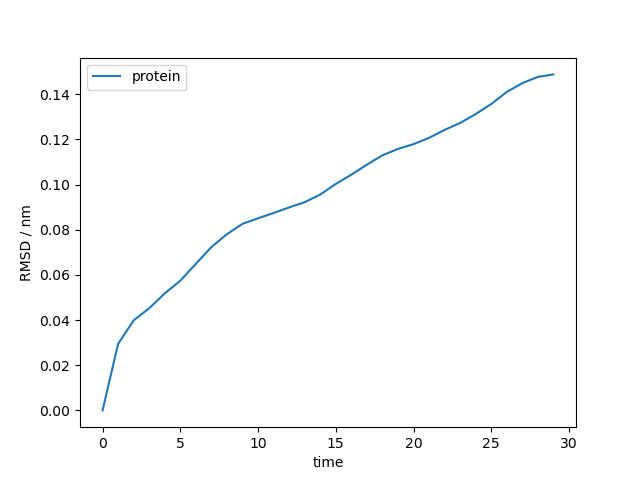

In [28]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_030528'))

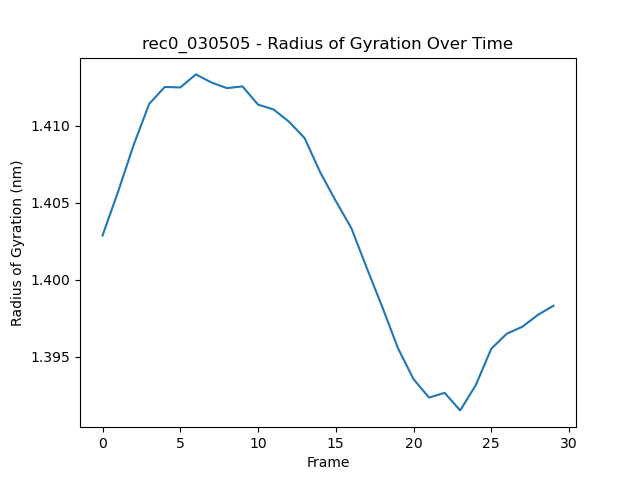

In [27]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_030534'))

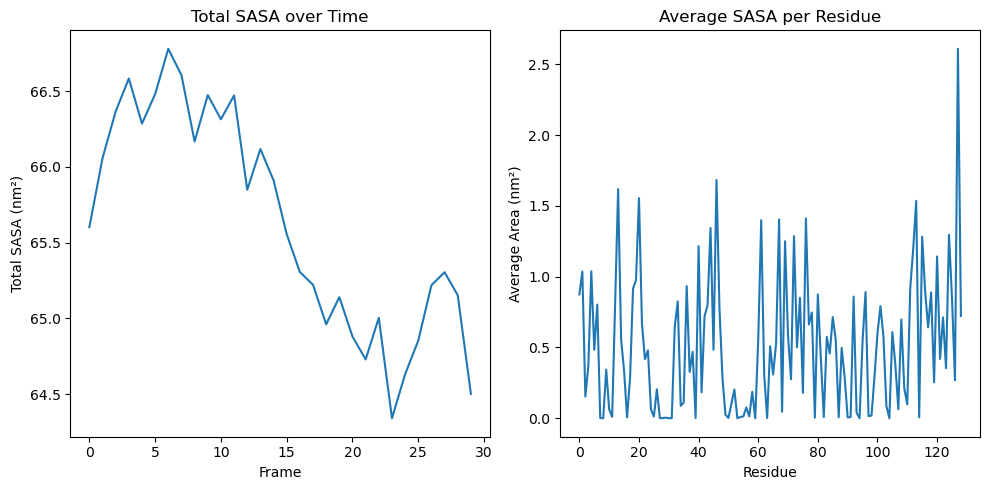

In [26]:
# make sure sasa plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_030532'))

In [25]:
# make sure trajectory and topology exist (sim1)
traj_path_2_2 = registry_2.get_mapped_path("rec0_030515")
top_path_2_2 = registry_2.get_mapped_path("top_sim0_030515")

assert os.path.exists(traj_path_2_2)
assert os.path.exists(top_path_2_2)